# Week 3: Machine Learning Fundamentals for Estimating Treatment Effects

**Author:** Minjae Yun

- Lecture notes based on [Dr. Frandsen's workshop](https://github.com/Mixtape-Sessions/Machine-Learning)
- Notes by A. Colin Cameron [link](https://cameron.econ.ucdavis.edu/e240f/machlearn2019_Riverside_2.pdf)
- Notes from [Causal Inference for the Brave and True](https://matheusfacure.github.io/python-causality-handbook)
- Recommended Python notes from ISLP [link](https://github.com/JWarmenhoven/ISLR-python/tree/master)

## Prediction vs. Causality
### Functionality

**Examples of Prediction**

- A loan officer wants to know
the likelihood of an
individual repaying a loan
based on income,
employment, and other
characteristics.

- In order to decide whether
to invest in a start-up, an
investor needs to know how
likely the start-up is to
succeed, given the
entrepreneur’s experience
and the characteristics of
the industry
- A bail hearing judge needs
to know how likely a
defendant is to flee before
trial, given his or her
charges, criminal history,
and other characteristics

- A home seller wants to know
what price homes with the
characteristics of his or her
home typically sell for

- A Harvard admissions officer
wants to know how likely an
applicant with given
credentials is to graduate in
4 year

**Examples of influence**
- A mortgage lender wants to
know if direct debit will
increase loan repayments

- An entrepreneur needs to
know what the effect of
receiving funding from a
private equity investor
(rather than getting a loan)
is on the ultimate success of
an enterprise

- A policy maker needs to
know the effect of being
released on bail (rather than
detained) prior to trial on
ultimate conviction

- A home seller wants to know
by how much installing new
windows will raise the value
of his or her home

- A labor economist wants to
know whether individuals of
a certain ethnic background
are less likely to get into
Harvard than applicants with
similar academic credentials


--- 
![img](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Seawallventnor.jpg/280px-Seawallventnor.jpg)

> Causality: Urban planners often construct numerous seawalls in areas with high wave activity.

> Prediction: As a novice kayaker, you might choose to avoid beaches with extensive seawalls, as an abundance of seawalls typically signifies a high presence of waves.

---

### Cauality
- Gold Standard: Randomized Controlled Trial (RCT)
- Aluminum Standard: Regression or IV strategies that approximate controlled experiments

### Prediction
- Supervised machine learning 

### Causality vs Prediction
- answer different questions
- serve different purposes
- seek different targets
- use different methods

- Different strokes for different folks, or complementary tools in an applied economist’s toolkit?



---
## Where We Are
![image](https://lh3.googleusercontent.com/6tL3XcqhlRPaGgAF4hANzLmTTxD_DtxacEAWJysXrBdhlryXqN0fYluu_to2TE_4yGAos4z6X6a19x2ptNRWfa6sUfWMnNdWDRxFJvM_euKW-7FY=w1280)



---

![img](https://journals.sagepub.com/cms/10.1177/00031224211004187/asset/images/large/10.1177_00031224211004187-fig2.jpeg)

Source: American Sociological Review [link](https://journals.sagepub.com/doi/10.1177/00031224211004187)

---

## Gold Standard: RCT

Treatment indicator: $D_i \in \left\{0,1\right\}$
> *example:* eligibility for expanded Medicaid

Outcome: $Y_i$
> *example:* number of doctor visits in past 6 months

Potential outcomes $Y_i(0),Y_i(1)$

Individual-level treatment effect $\delta _{i}=Y_{i}\left( 1\right) -Y_{i}\left( 0\right) $ (can never know
this).

Unbiased estimate of average treatment effect:
$$
\hat{\delta}=\bar{Y}_{1}-\bar{Y}_{0},
$$
or OLS coefficient on $D_{i}$ from this regression:
$$
Y_{i}=\alpha +\delta D_{i}+\varepsilon _{i}.
$$

Let's run it!

In [1]:
# import some useful packages
import pandas as pd
# import numpy as np
from sklearn import linear_model

# read in data
oregonhie=pd.read_csv('https://github.com/Mixtape-Sessions/Machine-Learning/blob/main/Labs/data/oregon_hie_table5.csv?raw=true')

# data cleaning: drop observations with missing values in any of the variables we are going to need: 
regvarnames=['doc_num','treatment','weight']+[col for col in oregonhie if col.startswith('ddd')]
regvars=oregonhie[regvarnames].dropna()


# define outcome, treatment, weights, additional covariates
y=regvars['doc_num']
d=regvars[['treatment']]
w=regvars['weight']
x=regvars.drop(['doc_num','treatment','weight'],axis=1)

regvars

,doc_num,treatment,weight,ddddraw_sur_2,ddddraw_sur_3,ddddraw_sur_4,ddddraw_sur_5,ddddraw_sur_6,ddddraw_sur_7,dddnumhh_li_2,dddnumhh_li_3,ddddraXnum_2_2,ddddraXnum_2_3,ddddraXnum_3_2,ddddraXnum_3_3,ddddraXnum_4_2,ddddraXnum_5_2,ddddraXnum_6_2,ddddraXnum_7_2
0,0.0,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23736,4.0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23737,2.0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23738,2.0,1,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
23739,5.0,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# run weighted regression of outcome on treatment
lm=linear_model.LinearRegression()
lm.fit(d,y,w)

# display treatment effect
print("Estimated effect of Medicaid elibility on \n number of doctor visits" +
      " (bivariate): {:.3f}".format(lm.coef_[0]))

Estimated effect of Medicaid elibility on 
 number of doctor visits (bivariate): 0.268


## Aluminum standard: Regression control

The bivariate regression above leans heavily on random assignment of treatment: 
$$
D_{i}\perp\!\!\!\!\perp \left( Y_{i}\left( 0\right) ,Y_{i}\left( 1\right) \right) .
$$
Sometimes, even in an RCT, treatment is assigned randomly only conditional on some set of covariates $X_i$. 
>*example:* in the Oregon HIE,
eligibility for Medicaid was granted via lottery, but households with more
members could have more lottery entries. So the lottery outcome is random
only conditional on household size. 

So what happens if we don't have random assignment? In terms of our regression model above, it means $\varepsilon_i$ may be correlated with $D_i$. For example, perhaps household size, $X_i$, which increases the probability of treatment, is also associated with more doctor visits. If $X_i$ is omitted from the model, it is part of the error term:
$$
\varepsilon_i=\beta X_i +\eta_i.
$$
We'll assume for now that everything else related to doctor visits ($\eta_i$) is unrelated to treatment. What does our bivariate regression coefficient deliver in this case?
$$
\hat{\delta}^{OLS}\underset{p}{\rightarrow}\frac{Cov\left(Y_i,D_i\right)}{Var\left(D_i\right)}=\delta+\gamma\frac{Cov\left(X_i,D_i\right)}{Var\left(D_i\right)}
$$
Simple regression gives us what we want ($\delta$) plus an **omitted variables bias** term. The form of this term tells us what kinds of $X_i$ variables we should take care to control for in our regressions.

According to the OVB formula, what kinds of variables should be be sure to control for in regressions?

Careful investigators will find a set of regressors $X_i$ for which they are willing to assume
treatment is as good as randomly assigned:
$$
D_i\perp\!\!\!\!\perp\left( Y_{i}\left( 0\right) ,Y_{i}\left( 1\right) \right) |X_{i}
\text{.}
$$
This combined with a linear model for the conditional expectation of $%
Y_{i}\left( 0\right) $ and $Y_{i}\left( 1\right) $ given $X_{i}$ means we
can estimate the average treatment via OLS on the following regression
equation:
$$
Y_{i}=\delta D_{i}+X_{i}^{\prime }\beta +\varepsilon _{i}.
$$


In [3]:
# Add the household size indicators to our regressor set and run regression:
lm.fit(pd.concat([d,x],axis=1),y,w)
print("Estimated effect of Medicaid elibility on \n number of doctor visits" +
      " (with controls): {:.3f}".format(lm.coef_[0]))

Estimated effect of Medicaid elibility on 
 number of doctor visits (with controls): 0.314


How did the estimate of the effect of Medicaid eligility change? What does that tell us about the relationship between the included regressors and the outcome and treatment?

### Omitted Variable Bias Implication


|  |+ Corr(OV,Y)|- Corr(OV,Y) |
|------------|------------|-------------|
|+ Corr(OV,X)|Too Big     |Too Small    |
|- Corr(OV,X)|Too Small   |Too Big      |

In other words,

<img src="https://journals.sagepub.com/cms/10.1177/01492063211006458/asset/images/large/10.1177_01492063211006458-fig5.jpeg" alt="drawing" width="600"/>

Source [link](https://journals.sagepub.com/doi/10.1177/01492063211006458)

### Traditional regression strategy:
1. Regress $Y_i$ on $X_i$ and compute the residuals,
$\tilde{Y_i} = Y_i − Y_i^{\text{OLS}}$, where
$Y_i^{\text{OLS}} = X_i'(X'X)^{-1}X'Y$

2. Regress $D_i$ on $X_i$ and compute the residuals,
$\tilde{D_i} = D_i - D_i^{\text{OLS}}$, where $D_i^{\text{OLS}} = X_i'(X'X)^{-1}X'Y$

3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

- When OLS might not be the right tool for the job: <br>
there are many variables in $X_i$ <br>
the relationship between $X_i$ and $Y_i$ or $D_i$ may not be linear



---
### Frisch-Waugh-Lovell Theorem

- The theorem proves that the coefficient obtained in Step 3 is identical to the original coefficient obtained when regressing $ Y_i$ on $D_i$ while controlling for $X_i $.

- Both Steps 1 and 2 should be conducted as long as $D_i$ is correlated with $X_i$. For more details, refer to [Mostly Harmless Econometrics (MHE)](https://www.dsecoaching.com/pdf/2008%20Angrist%20Pischke%20MostlyHarmlessEconometrics.pdf).

---

In [4]:
# Regress outcome on covariates
yreg=linear_model.LinearRegression().fit(x,y,w)
# Calculate residuals
ytilde = y - yreg.predict(x)

# regress treatment on covariates
dreg = linear_model.LinearRegression().fit(x,d,w)
# Calculate residuals
dtilde = d - dreg.predict(x)

# regress ytilde on dtilde
lm.fit(dtilde,ytilde,w)
print("Estimated effect of Medicaid elibility on \n number of doctor visits" +
      " (partialled out): {:.3f}".format(lm.coef_[0]))

Estimated effect of Medicaid elibility on 
 number of doctor visits (partialled out): 0.314


Where does machine learning fit into this? It might be tempting to treat this regression as a prediction exercise where we are predicting $Y_{i}$ given $D_{i}$ and $X_{i}$. Don't give in to this temptation. We are not after a prediction for $Y_{i}$, we are after a coefficient on $D_{i}$. Modern machine learning algorithms are finely tuned for producing predictions, but along the way **they compromise coefficients**. So how can we deploy machine learning in the service of estimating the causal coefficient $\delta $?

### Machine Learning strategy:
1. Predict $Y_i$ on $X_i$ with ML and compute the residuals,
$\tilde{Y_i} = Y_i − Y_i^{\text{ML}}$, where
$Y_i^{\text{ML}} = $ prediction generated by ML

2. Predict $D_i$ on $X_i$ with ML and compute the residuals,
$\tilde{D_i} = D_i - D_i^{\text{ML}}$, where $D_i^{\text{ML}} = $ prediction generated by ML

3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

- the step 1 could be omitted if D and X are uncorrelated, which is extremley rare [link](https://bookdown.org/ts_robinson1994/10EconometricTheorems/frisch.html)
- Illustrate using the Oregon Health Insurance Experiment


ML enters the picture by providing an alternate way to generate $\hat{Y}_i$ and $\hat{D}_i$ when OLS is not the best tool for the job. The first two steps are really just prediction exercises, and in principle any supervised machine learning algorithm can step in here.

# Prediction

Outcome to be predicted: $Y_i$
> *example:* a worker's log wage

Characteristics (aka **features**): $X_i=\left(X_{1i},\ldots,X_{pi}\right)'$
> *example:* education, age, state of birth, parents' education, cognitive ability, family background

Estimate the function
$\hat{f}$ (aka **train the model**) based on training sample ${(Y_i , X_i ); i = 1, ...,N}$
> *example:* OLS, Lasso, Ridge, Elastic nets, Random Forest

In [5]:
%matplotlib inline

# import some useful packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


plt.style.use('seaborn-whitegrid')

# read in data
nlsy=pd.read_csv('https://github.com/Mixtape-Sessions/Machine-Learning/blob/main/Labs/data/nlsy97.csv?raw=true')
nlsy

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
0,4.076898,16,0,0,0,11,7.0724,12,12,3,...,0,0,0,0,0,0,0,0,0,0
1,3.294138,9,0,0,0,19,4.7481,9,10,2,...,0,0,0,0,0,1,0,0,0,0
2,2.830896,9,0,1,0,22,1.1987,12,9,3,...,0,0,0,0,0,0,0,0,1,0
3,4.306459,16,0,0,0,13,8.9321,16,18,2,...,1,0,0,0,0,0,0,0,0,0
4,5.991465,16,0,1,0,15,2.2618,16,16,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.833475,14,1,0,0,17,3.8179,15,12,2,...,0,0,0,1,0,0,0,0,0,0
1262,3.341985,9,0,1,0,20,3.3043,12,11,2,...,0,0,0,0,0,0,1,0,0,0
1263,-0.928125,10,1,0,0,19,1.0319,10,13,2,...,0,0,0,0,0,1,0,0,0,0
1264,3.702931,18,0,0,0,12,8.5093,16,19,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# generate dictionary of transformations of education
powerlist=[nlsy['educ']**j for j in np.arange(1,10)]
X=pd.concat(powerlist,axis=1)
X.columns = ['educ'+str(j) for j in np.arange(1,10)]
# standardize our X matrix (doesn't matter for OLS, but will matter for lasso below)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# run least squares regression
# instantiate and fite our regression object:
reg=linear_model.LinearRegression().fit(X_scaled,nlsy['lnw_2016'])
# generate predicted values
yhat=reg.predict(X_scaled)


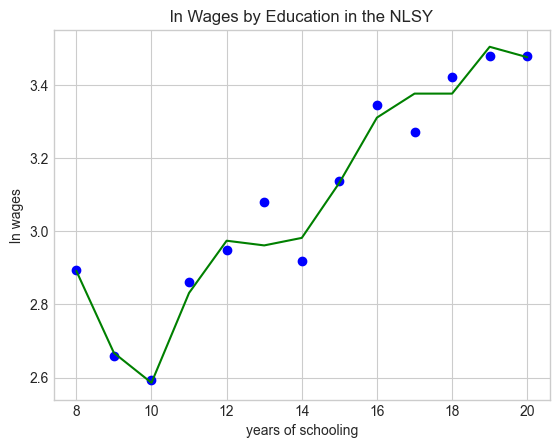

In [7]:
# plot predicted values
lnwbar=nlsy.groupby('educ')['lnw_2016'].mean()
Xbar=pd.DataFrame({'educ':lnwbar.index.values})
powerlist=[Xbar['educ']**j for j in np.arange(1,10)]
Xbar=pd.concat(powerlist,axis=1)
Xbar.columns = X.columns
Xbar_scaled = scaler.transform(Xbar)
ybarhat=reg.predict(Xbar_scaled)
fig = plt.figure()
ax = plt.axes()
ax.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat,'g-');
plt.title("ln Wages by Education in the NLSY")
plt.xlabel("years of schooling")
plt.ylabel("ln wages");

As we can see, least squares linear regression can approximate any continuous function and can certainly be used for prediction. Include a rich enough set of transformations, and OLS predictions will yield unbiased estimates of the true ideal predictor, the conditional expectation function. But these estimates will be quite noisy. Penalized regression can greatly reduce the variance, at the expense of some bias. But if the bias reduction is great enough, the predictions can have lower the **out-of-sample** MSE.

### Bias-Variance Trade-Off Recap

The Mean Squared Error (MSE) is a commonly used measure to evaluate model fit:

<p style="text-align: center;">  $MSE = \frac{1}{n} \sum (y-f(x))^2$ </p>

The expected test MSE at $x_0$ decomposes into three components (testing estimated function through numerous out-of-sample training sets):

<p style="text-align: center;"> $E(y_0-\hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon) $, </p>

## Lasso in action

- Penalized Regression

**When is it the right tool for the job:**
- When you have a large number of potential regressors (including powers or other transformations), maybe even more than the sample size!
- Out of these, only a relatively few (but you don’t know which) really matter (what do we mean by “matter?”). We call this **approximate sparsity**

 $\text{argmin}_\beta \sum_i (y_i-x_i'\beta)^2 + \lambda \sum_j |\beta_j| $
 
 
- What does $\lambda$ do and how do we choose it?

**Caveats and considerations:**
- Important to standardize regressors pre-lasso
- Can give unexpected results with dummy variables
- Resist the temptation to interpret coefficients or the included variables as the "true model!"

In [8]:
# fit lasso with a couple of different alphas and plot results
# instantiate and fite our lasso object
lasso1 = linear_model.Lasso(alpha=.0005,max_iter=1000).fit(X_scaled,nlsy['lnw_2016'])
#generate predicted values
ybarhat1=lasso1.predict(Xbar_scaled)

# same thing but with a different alpha
lasso2 = linear_model.Lasso(alpha=.01,max_iter=1000).fit(X_scaled,nlsy['lnw_2016'])
ybarhat2=lasso2.predict(Xbar_scaled)


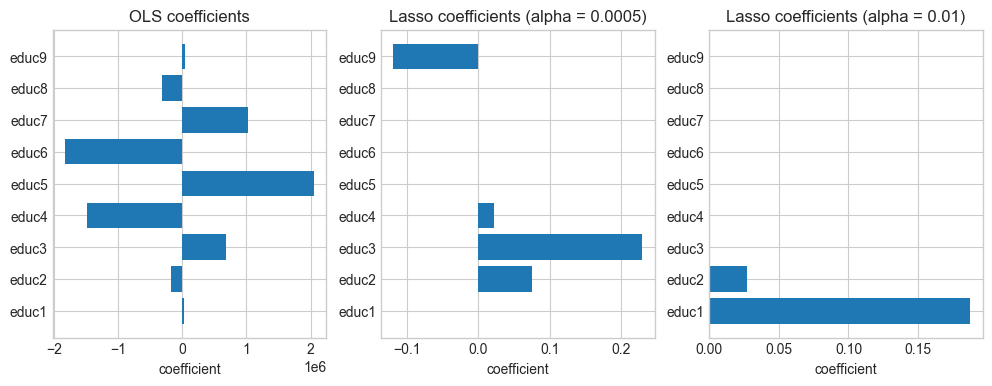

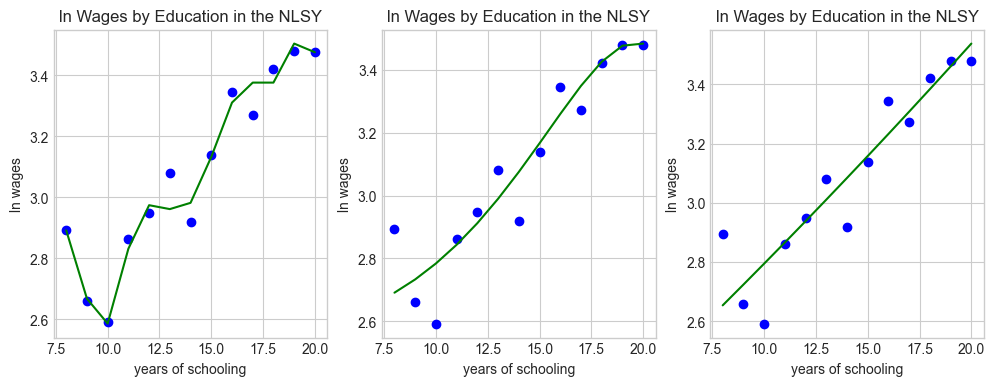

In [9]:
#@title
fig1,(ax11,ax12,ax13) = plt.subplots(1,3,figsize=(12, 4))
ax11.barh(Xbar.columns,reg.coef_,align='center');
ax11.set_title("OLS coefficients")
ax11.set_xlabel("coefficient")
ax12.barh(Xbar.columns,lasso1.coef_,align='center');
ax12.set_title("Lasso coefficients (alpha = {:.4f})".format(lasso1.get_params()['alpha']))
ax12.set_xlabel("coefficient")
ax13.barh(Xbar.columns,lasso2.coef_,align='center');
ax13.set_title("Lasso coefficients (alpha = {:.2f})".format(lasso2.get_params()['alpha']))
ax13.set_xlabel("coefficient")
fig2,(ax21,ax22,ax23) = plt.subplots(1,3,figsize=(12,4))
ax21.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat,'g-');
ax21.set_title("ln Wages by Education in the NLSY")
ax21.set_xlabel("years of schooling")
ax21.set_ylabel("ln wages");
ax22.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat1,'g-');
ax22.set_title("ln Wages by Education in the NLSY")
ax22.set_xlabel("years of schooling")
ax22.set_ylabel("ln wages");
ax23.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat2,'g-');
ax23.set_title("ln Wages by Education in the NLSY")
ax23.set_xlabel("years of schooling")
ax23.set_ylabel("ln wages");

Play around with different values for alpha to see how the fit changes!

### Data-driven tuning parameters: Cross-validation

- All supervised ML methods have tuning parameters:
- Tuning parameters are the rudder by which we navigate the bias-variance tradeoff

In [10]:
# define grid for alpha
alpha_grid = {'alpha': [.0001,.001,.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
# instantiate and fit our gridsearchcv object
grid_search = GridSearchCV(linear_model.Lasso(),alpha_grid,cv=5,return_train_score=True).fit(X_scaled,nlsy['lnw_2016'])
# print out the chosen value for alpha
print("Best alpha: ",grid_search.best_estimator_.get_params()['alpha'])

Best alpha:  0.014


### Lasso-guided variable selection
For illustrative purposes we've been using lasso to determine the functional form for a single underlying regressor: education. But lasso's real power comes in selecting among a large number of regressors.

In [11]:
# Define "menu" of regressors:
X=nlsy.drop(columns=['lnw_2016','exp'])

# Divide into training and test set so we can honestly gauge predictive accuracy
X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
# Scale regressors
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Do cross-validated Lasso (the easy way!)
# instantiate and fit our lassocv object
lassocv=linear_model.LassoCV(random_state=42).fit(X_train_scaled,y_train)
# print out the chosen value for alpha
print("Chosen alpha: {:.3f}".format(lassocv.alpha_))
# print the original number of regressors and the number selected by lasso
print("Number of regressors in the menu: ",len(X.columns))
print("Number of regressors selected by lasso: ",sum(lassocv.coef_!=0))
# print out accuracy on training and test test
print("Accuracy on training set: {:.3f}".format(lassocv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(lassocv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[lassocv.coef_!=0],'coefficient': lassocv.coef_[lassocv.coef_!=0]})
results

Chosen alpha: 0.045
Number of regressors in the menu:  992
Number of regressors selected by lasso:  59
Accuracy on training set: 0.249
Accuracy on test set: 0.103


,feature,coefficient
0,educ,0.094004
1,black,-0.062092
2,hispanic,0.012279
3,afqt,0.072048
4,ysaq_284_1997,0.029376
5,youth_bothbio_01_1997,0.015209
6,p4_001_1997,-0.031068
7,cv_yth_rel_hh_age_2_1997,-0.007405
8,fp_adpenvri_1997,-0.002718
9,cvc_govnt_prg_yr_94_xrnd,-0.000061


## Ridge regression

First, whiteboard. Ridge is another flavor of penalized regression, like lasso. But unlike lasso, ridge penalizes the squares (not the absolute values) of the coefficients. As a result, ridge shrinks coefficients toward zero, but not all the way.

**When is it the right tool for the job:**
- When you have a large number of regressors including highly collinear ones

$\text{argmin}_\beta \sum_i (y_i-x_i'\beta)^2 + \lambda \sum_j \beta_j^2 $

**Caveats and considerations:**
- Important to standardize regressors pre-ridge
- Shrinks (biases) coefficients towards zero, but not all the way (unlike lasso)


In [13]:
ridgecv=linear_model.RidgeCV(cv=5,alphas=(.1,1,10,50,100,1000)).fit(X_train_scaled,y_train)
print("Chosen alpha: {:.3f}".format(ridgecv.alpha_))
print("Accuracy on training set: {:.3f}".format(ridgecv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(ridgecv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[ridgecv.coef_!=0],'coefficient': ridgecv.coef_[ridgecv.coef_!=0]})
results

Chosen alpha: 1000.000
Accuracy on training set: 0.486
Accuracy on test set: -0.048


,feature,coefficient
0,educ,0.038142
1,black,-0.031903
2,hispanic,0.031672
3,other,-0.013500
4,afqt,0.038021
...,...,...
907,_XPexp_19,-0.021927
908,_XPexp_20,-0.014198
909,_XPexp_21,0.002014
910,_XPexp_22,-0.011529


### ...
What do we learn about the relative performance of Lasso and Ridge in this setting? What could be the explanation?

One way to compare Lasso and Ridge, is to visualize their coefficients:

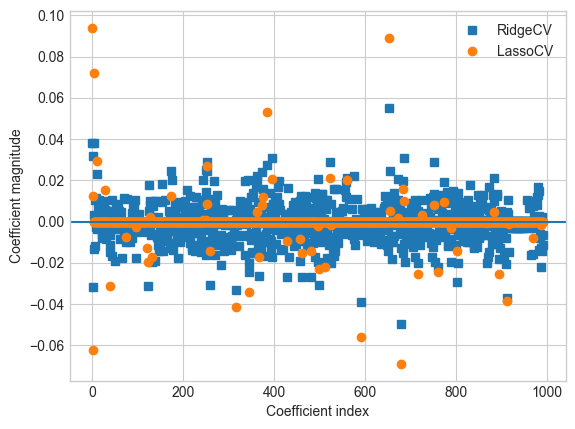

In [14]:
plt.plot(ridgecv.coef_, 's', label="RidgeCV")
plt.plot(lassocv.coef_, 'o', label="LassoCV")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend()

## Elastic Net: best of both worlds?
Elastic net combines lasso and ridge penalization. First, a bit of whiteboard, then let's give it a try.

$\text{argmin}_\beta \sum_i (y_i-x_i'\beta)^2 + \alpha \gamma \sum_j |\beta| + 0.5\alpha (1-\gamma) \sum \beta_j^2 )$

**Caveats and considerations:**
- Two tuning parameters: $\alpha$ and $\gamma$
- Important to standardize regressors pre-ridge
- Zeros out many regressors, shrinks (biases) remaining coefficients towards zero

In [15]:
encv=linear_model.ElasticNetCV(random_state=42,l1_ratio=[.1, .5, .7, .9, .95, .99, 1]).fit(X_train_scaled,y_train)
print("Chosen l1 ratio: {:.3f}".format(encv.l1_ratio_))
print("Chosen alpha: {:.3f}".format(encv.alpha_))
print("Number of regressors in the menu: ",len(X.columns))
print("Number of regressors selected by elastic net: ",sum(encv.coef_!=0))
print("Accuracy on training set: {:.3f}".format(encv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(encv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[encv.coef_!=0],'coefficient': encv.coef_[encv.coef_!=0]})
results

Chosen l1 ratio: 0.500
Chosen alpha: 0.090
Number of regressors in the menu:  992
Number of regressors selected by elastic net:  70
Accuracy on training set: 0.245
Accuracy on test set: 0.102


,feature,coefficient
0,educ,0.088755
1,black,-0.059167
2,hispanic,0.010870
3,afqt,0.071367
4,dad_educ,0.000199
...,...,...
65,_BGhfp_adpe_7,-0.022920
66,_BGhp5_102__3,-0.037543
67,_BGhp5_102__7,-0.000845
68,_BGhcvc_govq4,-0.007933


### ...
Not surprisingly, it doesn't look terribly different from lasso.

---
### k-Fold Cross-Validation Explainer

#### Procedure

The cross-validation procedure involves dividing the sample into $K$ folds. The steps are as follows:

1. **Choose Tuning Parameter**: Select a value for the tuning parameter $\lambda$.
2. **Iterate Over Folds**: For each fold $k$ ranging from 1 to $K$:
    1. **Train the Model**: Train the model while leaving out the $k^{th}$ fold.
    2. **Generate Predictions**: Make predictions for the $k^{th}$ fold.
    3. **Compute MSE for Fold $k$**: 
    
    $\text{MSE}_k = \frac{1}{n_k} \sum_i (Y_i - \hat{Y_i})^2$


3. **Compute Overall MSE**: Calculate the overall MSE corresponding to the current choice of $\lambda$:

$\text{MSE}(\lambda) = \frac{1}{K} \sum_k \text{MSE}_k$

4. **Optimize $\lambda$**: Repeat the above steps for various values of $\lambda$. Choose the value $\lambda^*$ that minimizes the cross-validated MSE. Note that this is not a simultaneous optimization.

---

In [16]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [17]:
df1 = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


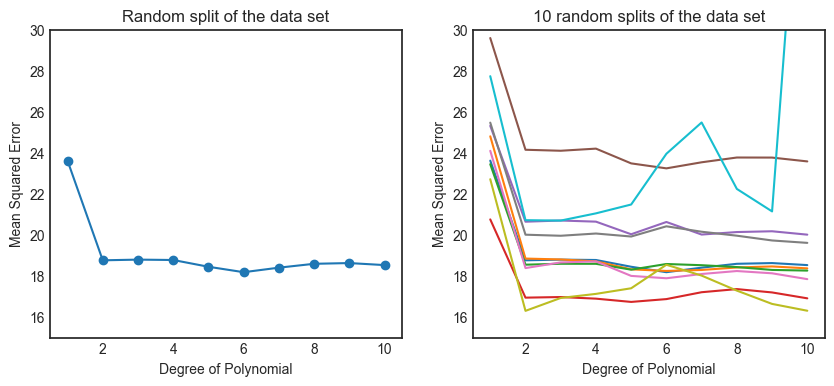

In [18]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

In [19]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df1)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df1.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [20]:
# k-fold CV
folds = 10
elements = len(df1.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j],shuffle=True)
    Z[i,j] = cross_val_score(regr, X_poly, df1.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()    

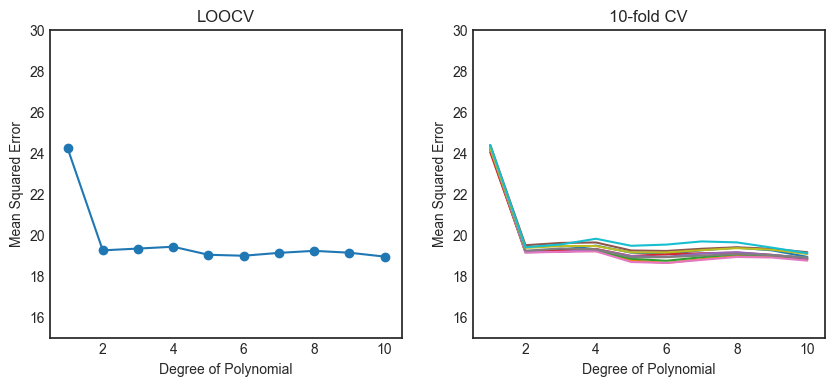

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

## Decision Trees and Random Forests

**Starting from the entire observations**
<img src="https://github.com/MinjaeYun/2023fall/blob/main/images/dt1.png?raw=true" alt="drawing" width="380"/>

**First Split based on income**
<img src="https://github.com/MinjaeYun/2023fall/blob/main/images/dt2.png?raw=true" alt="drawing" width="410"/>

**Each Second Split from the first split**
<img src="https://github.com/MinjaeYun/2023fall/blob/main/images/dt3.png?raw=true" alt="drawing" width="410"/>

**Final Classification**
<img src="https://github.com/MinjaeYun/2023fall/blob/main/images/dt4.png?raw=true" alt="drawing" width="410"/>

**Where to split:**
Choose the feature from ${x_1, . . . , x_p}$ and the value of that feature to minimize MSE in the resulting child nodes

**Tuning parameters**
- Max depth
- Min training obs per leaf
- Min improvement in fit in order to go ahead with a split

---
### Assumptions for Obtaining Causal Treatment Effect

#### 1. Functional Form Assumptions

- **Constant Effects Over Time**: No heterogeneous effects in time.
- **Linearity in Covariates**: Assumes a linear relationship with covariates.
- **Additive Fixed Effects**: The model includes additive fixed effects.

#### 2. Strict Exogeneity

- **Parallel Trends**: Assumes that the trends are parallel over time.
- **No Anticipation**: Assumes no anticipation effects.
- **No Unobserved Time-Varying Confounders**: Assumes no hidden variables that change over time.
- **No Carryover**: Past treatment does not affect the current outcome.
- **No Feedback**: Past outcomes do not affect the current treatment.

**Note**: 

- **Linearity in Covariates** assumption is relaxed here.

- **Partially Linear Model**: The data generating process for $Y_i$ is still additive with respect to $D_i$:

$Y_i = D_i + g(X) + e_i$

---

In [29]:
#@title
import requests
url1 = 'https://www.dropbox.com/s/jgml061manxpawo/plot_2d_separator.py?raw=true'
url2 = 'https://www.dropbox.com/s/hlrrlwm4kt36awb/plot_interactive_tree.py?raw=true'
url3 = 'https://www.dropbox.com/s/e2cy203sr30a59z/plot_helpers.py?raw=true'
url4 = 'https://www.dropbox.com/s/aik5sgcwgz4brwn/tools.py?raw=true'
r1 = requests.get(url1)
r2 = requests.get(url2)
r3 = requests.get(url3)
r4 = requests.get(url4)

# make sure your filename is the same as how you want to import 
with open('plot_2d_separator.py', 'w') as f1:
    f1.write(r1.text)

with open('plot_interactive_tree.py', 'w') as f2:
    f2.write(r2.text)

with open('plot_helpers.py', 'w') as f3:
    f3.write(r3.text)

with open('tools.py', 'w') as f4:
    f4.write(r4.text)

# now we can import
import plot_helpers
import tools
import plot_2d_separator
import plot_interactive_tree

Let's illustrate how random forests average over a collection of individual trees:

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

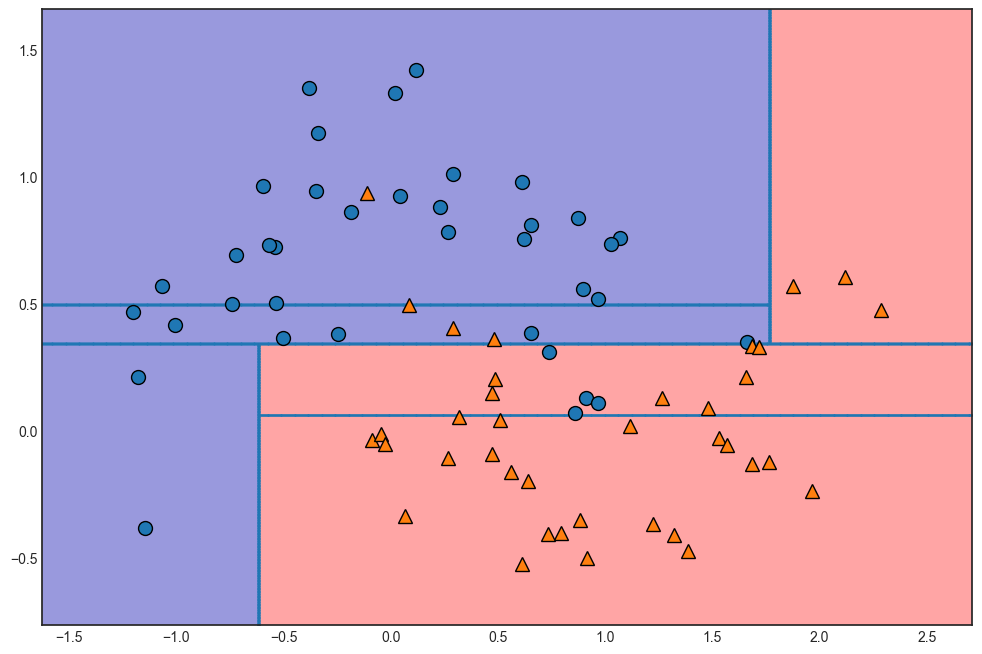

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import make_moons

Xfake, yfake = make_moons(n_samples=100, noise=0.25, random_state=3)
Xfake_train, Xfake_test, yfake_train, yfake_test = train_test_split(Xfake, yfake, stratify=yfake,
                                                    random_state=42)

#First a simple tree:
tree = DecisionTreeClassifier(max_depth=3).fit(Xfake_train,yfake_train)
fig1,ax = plt.subplots(1,1,figsize=(12, 8))
plot_interactive_tree.plot_tree_partition(Xfake_train, yfake_train, tree, ax=ax)
dot_data= export_graphviz(tree, out_file=None, impurity=False, filled=True)
graph = graphviz.Source(dot_data) 
graph

## Forest for the Trees

Value proposition: reduce variance by averaging together multiple predictions
- The catch: individual trees need to be de-correlated

**Algorithm:**
- Grow B trees, each on a different bootstrapped sample
- At each split, consider only a random subset of features
- Average together the individual predictions

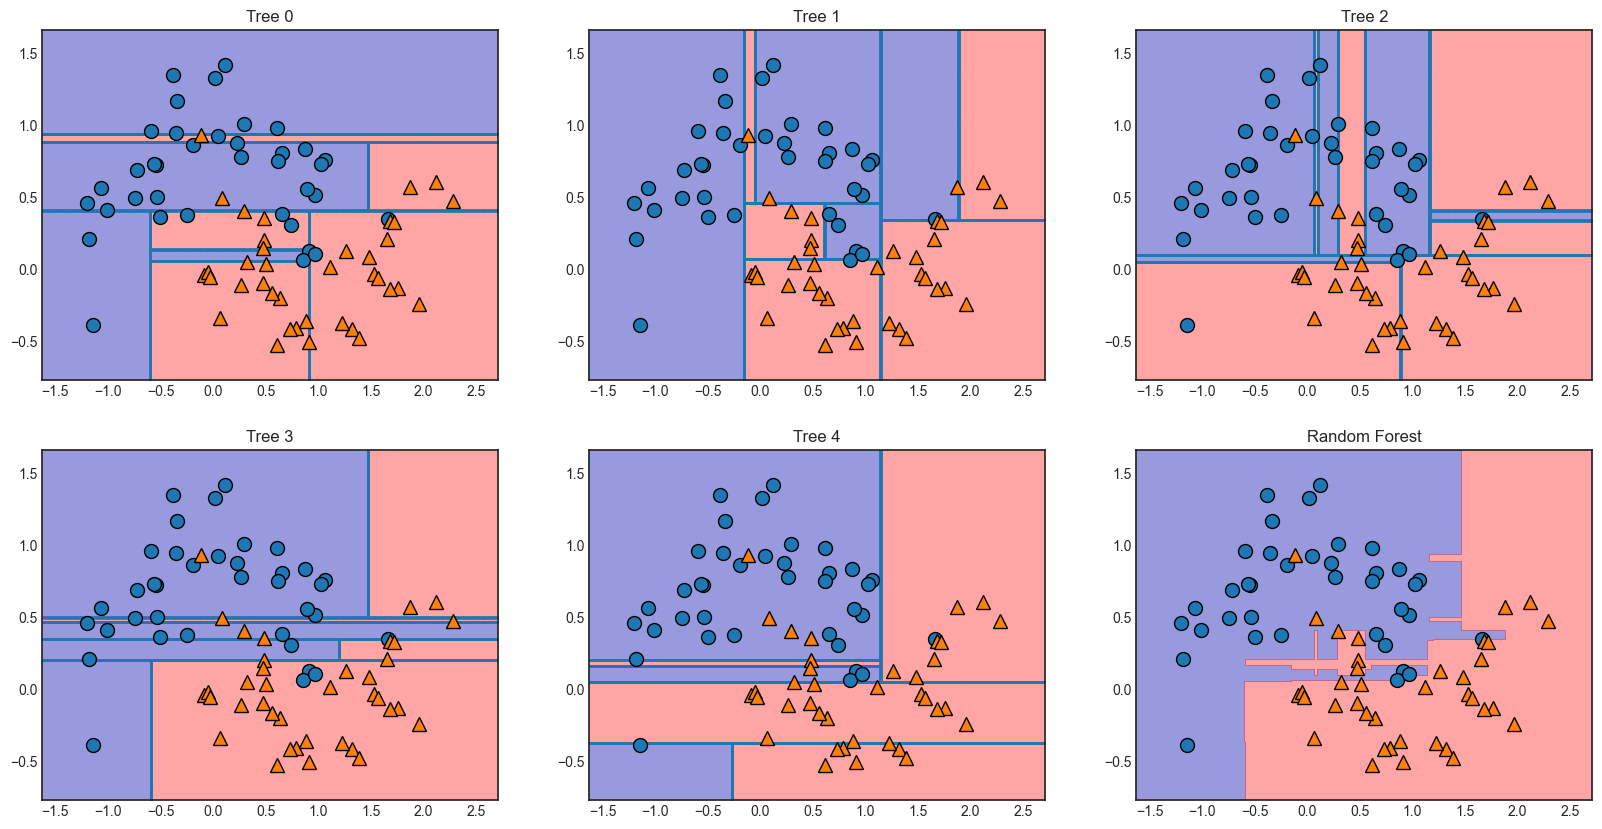

In [35]:
# Now average over several trees:

forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(Xfake_train, yfake_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_interactive_tree.plot_tree_partition(Xfake_train, yfake_train, tree, ax=ax)
    
plot_2d_separator.plot_2d_separator(forest, Xfake_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
plot_helpers.discrete_scatter(Xfake_train[:, 0], Xfake_train[:, 1], yfake_train)

Enough with fake data. Let's use random forests to predict wages in the NLSY, just as we did for Lasso, Ridge, and Elastic net. Try it on your own! Hint: we want RandomForestRegressor, not RandomForestClassifier. For bonus points, cross-validate random forest's tuning parameters using GridSearchCV.

In [36]:
from sklearn.ensemble import RandomForestRegressor

# First without cross-validating
rf=RandomForestRegressor(random_state=42).fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.705


In [37]:
# Now with cross-validation
# define grid for max_depth
param_grid = {'max_depth': [5,10,100]}
grid_searchrf = GridSearchCV(RandomForestRegressor(),param_grid,cv=5,return_train_score=True).fit(X_train,y_train)
print("Best max_depth: ",grid_searchrf.best_estimator_.get_params()['max_depth'])
print("Accuracy on training set: {:.3f}".format(grid_searchrf.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(grid_searchrf.score(X_test,y_test)))

Best max_depth:  5
Accuracy on training set: 0.801
Accuracy on test set: 0.717


How does Random Forest compare with Lasso?

# Post Double Selection Lasso (PDS Lasso)
- Belloni, Chernozhukov, Hansen

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold

nlsy=pd.read_csv('https://github.com/Mixtape-Sessions/Machine-Learning/blob/main/Labs/data/nlsy97.csv?raw=true')
nlsy

In [ ]:
lm=linear_model.LinearRegression().fit(d,y)
print("Simple regression race gap: {:.3f}".format(lm.coef_[0]))

### ...
Is this the effect we're looking for? 

Let's try a regression where we control for a few things: education (linearly), experience (linearly), and cognitive ability (afqt, linearly).

Try it yourself!

In [ ]:
# define RHS, matrix of the d and the controls we want
RHS=nlsy[['black','educ','exp','afqt']]
# run regression
lm.fit(RHS,y)
# print out coefficient
print("Multiple regression-adjusted race gap: {:.3f}".format(lm.coef_[0]))




###...
How does it compare to the simple regression? 

But who is to say the controls we included are sufficient? We have a whole host (hundred!) of other potential controls, not to mention that perhaps the controls we did put in enter linearly. This is a job for ML!

To prep, let's define a matrix X with all of our potential controls:

In [ ]:
X=nlsy.drop(columns=['lnw_2016','black'])

## Post Double Selection Lasso

**PDS is implemented in three steps:**
1. Lasso $Y_i$ on $X_i$, collect retained features in $X_i^Y$
2. Lasso $D_i$ on $X_i$, collect retained features in $X_i^D$
3. Regress $Y_i$ on $D_i$ and $X_i^Y \cup X_i^D$

*Caveats and considerations:*
- I Standardizing controls pre-lasso is important
- BCH have a formula for the penalty parameter, but cross-validation seems to work just fine
- Inference: just use robust SEs from last step!

### Step 1: Lasso the outcome on X
Try it yourself. Don't forget to standard Xs, or choose the normalize=True option

In [ ]:
lassoy = linear_model.LassoCV(max_iter=1000,normalize=True).fit(X, y)

### Step 2: Lasso the treatment on X
Try it yourself

In [ ]:
lassod = linear_model.LassoCV(max_iter=1000,normalize=True).fit(X, d)

### Step 3: Form the union of controls
Try it yourself

In [ ]:
Xunion=X.iloc[:,(lassod.coef_!=0) + (lassoy.coef_!=0)]
Xunion.head()

### Concatenate treatment with union of controls and regress y on that and print out estimate
Try yourself

In [ ]:
rhs=pd.concat([d,Xunion],axis=1)
fullreg=linear_model.LinearRegression().fit(rhs,y)
print("PDS regression earnings race gap: {:.3f}".format(fullreg.coef_[0]))

## Double/de-biased machine learning (DML): Preliminaries
- Chernozhukov, Chetverikov, Demirer, Duflo, Hansen, Newey, Robins

### DML strategy:

1. Predict $Y_i$ on $X_i$ with ML and compute the residuals,
$\tilde{Y_i} = Y_i − Y_i^{\text{ML}}$, where
$Y_i^{\text{ML}} = $ prediction generated by ML

2. Predict $D_i$ on $X_i$ with ML and compute the residuals,
$\tilde{D_i} = D_i - D_i^{\text{ML}}$, where $D_i^{\text{ML}} = $ prediction generated by ML

3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

$Y_i^{\text{DML}}$ and $D_i^{\text{DML}}$ should be predictions generated by a machine learning model trained on a set of observations that does not include i.

**Recipe:**

1. Divide the sample into K folds
2. For k = 1, .... ,K
> - Train a model to predict $Y$ given $X$, leaving out observations i in fold k: $\hat{Y}^{-k}(x)$ 
> - Train a model to predict D given X, leaving out observations i in fold k: $\hat{D}^{-k}(x)$
> - Form residuals $\tilde{Y_i}$ = $Y_i$ - $\hat{Y}^{-k}(x)$ and $\tilde{D_i}$ = $D_i$ - $\hat{D}^{-k}(x)$
3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

**Caveats and considerations:**

- Cross-validation to choose tuning parameters
- Inference: use robust SEs from last step

For simplicity, we will first do it without sample splitting

### Step 1: Ridge outcome on Xs, get residuals
Try yourself

In [ ]:
ridgey = linear_model.RidgeCV(normalize=True).fit(X, y)
yresid=y-ridgey.predict(X)

### Step 2: Ridge treatment on Xs, get residuals
Try yourself

In [ ]:
ridged = linear_model.RidgeCV(normalize=True).fit(X, d)
dresid=d-ridged.predict(X)

### Step 3: Regress y resids on d resids and print out estimate
Try yourself

In [ ]:
dmlreg=linear_model.LinearRegression().fit(dresid,yresid)
print("DML regression earnings race gap: {:.3f}".format(dmlreg.coef_[0]))

### The real thing: with sample splitting

In [ ]:
# create our sample splitting "object"
kf = KFold(n_splits=5,shuffle=True,random_state=42)

# apply the splits to our Xs
kf.get_n_splits(X)

# initialize columns for residuals
yresid = y*0
dresid = d*0

# Now loop through each fold
ii=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    d_train, d_test = d.iloc[train_index,:], d.iloc[test_index,:]
  
    # Do DML thing
    # Ridge y on training folds:
    ridgey.fit(X_train, y_train)

    # but get residuals in test set
    yresid.iloc[test_index]=y_test-ridgey.predict(X_test)

    #Ridge d on training folds
    ridged.fit(X_train, d_train)

    #but get residuals in test set
    dresid.iloc[test_index,:]=d_test-ridged.predict(X_test)
 
# Regress resids
dmlreg=linear_model.LinearRegression().fit(dresid,yresid)

print("DML regression earnings race gap: {:.3f}".format(dmlreg.coef_[0]))

You want standard errors, do you?

## Now do DML using Random Forest!

**What I hope you've gotten out of the last couple of days:**
- Clarity on distinction between predictive and causal questions
- Foot in the door with python implementations of some common modern supervised machine learning methods
- Tools for using ML methods to control for high dimensional covariates in the service of causal inference

**Preview for future workshops:**
- Use ML to predict heterogeneous treatment effects (e.g., random causal forests)
- ML and instrumental variables